In [1]:
!pip install --upgrade scipy
!pip install --upgrade arch
!pip install yfinance
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 14.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.1 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 35.3 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import yfinance as yf
from arch import arch_model

In [7]:
def get_financial_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)  #Downloading stock data
    return data['Close']

In [8]:
def fit_garch_model(returns, vol_model='GARCH', p=1, q=1):

    #Fit a GARCH model to he returns

    model = arch_model(returns, mean='Zero', vol=vol_model, p=p, q=q)
    model_fit = model.fit(disp='off')
    return model_fit

In [9]:
def preprocess_data(price_data):

    returns = 100 * price_data.pct_change().dropna()  # Convert prices to returns and drop NA values
    return returns

In [10]:
ticker = 'NVDA'  # NVIDIA stock
start_date = '2010-01-01'
end_date = '2024-08-01'

In [11]:
price_data = get_financial_data(ticker, start_date, end_date)
returns = preprocess_data(price_data)

[*********************100%%**********************]  1 of 1 completed


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

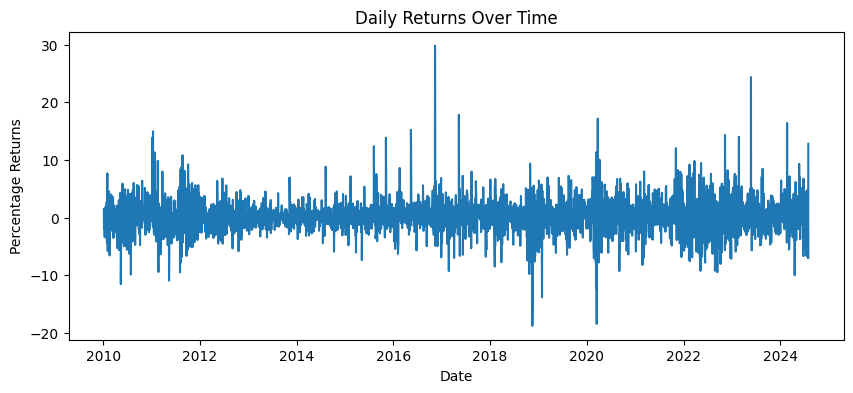

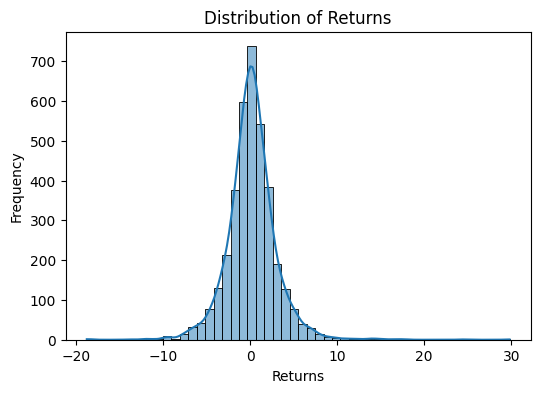

<Figure size 1000x400 with 0 Axes>

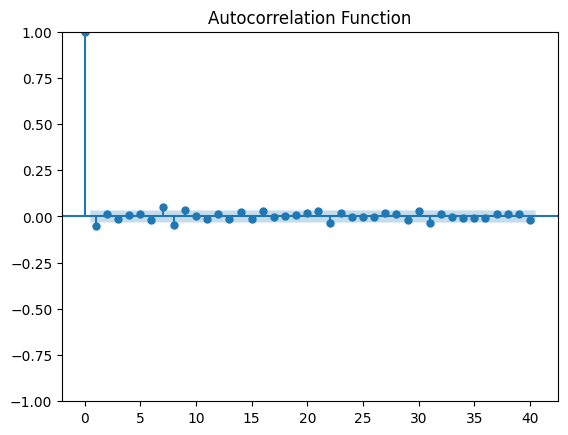

<Figure size 1000x400 with 0 Axes>

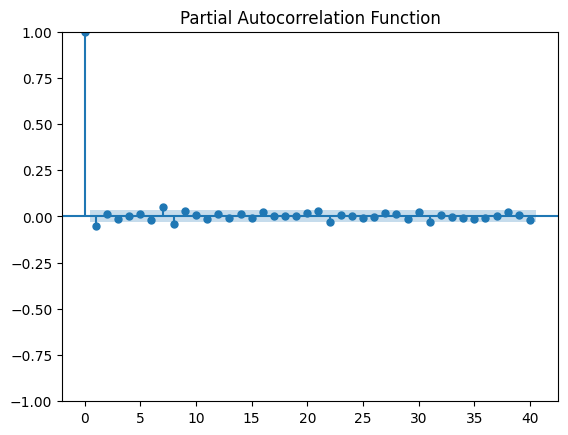

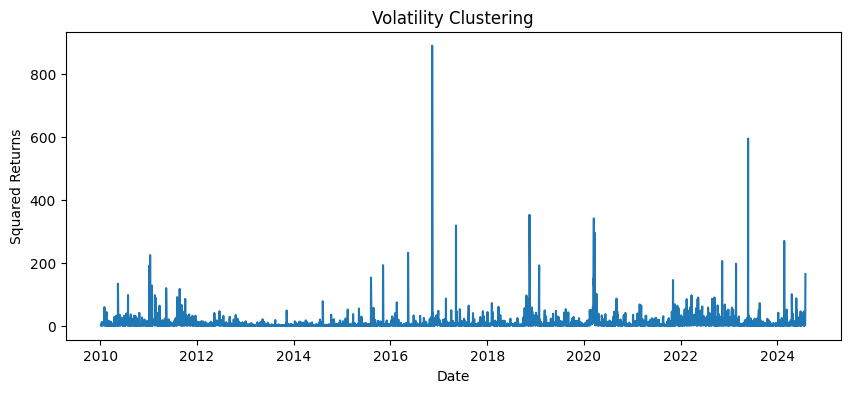

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'returns' is your Pandas Series of financial returns

# 1. Plotting Returns
plt.figure(figsize=(10, 4))
plt.plot(returns)
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage Returns')
plt.show()

# 2. Histogram of Returns
plt.figure(figsize=(6, 4))
sns.histplot(returns, bins=50, kde=True)
plt.title('Distribution of Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()

# This plot helps in understanding if the returns follow a normal distribution or have fat tails.

# 3. Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
plt.figure(figsize=(10, 4))
plot_acf(returns, lags=40, alpha=0.05)
plt.title('Autocorrelation Function')
plt.show()

plt.figure(figsize=(10, 4))
plot_pacf(returns, lags=40, alpha=0.05)
plt.title('Partial Autocorrelation Function')
plt.show()

# These plots help determine if there's a need for AR or MA components in your time series model.

# 4. Volatility Clustering
plt.figure(figsize=(10, 4))
plt.plot(returns**2)
plt.title('Volatility Clustering')
plt.xlabel('Date')
plt.ylabel('Squared Returns')
plt.show()

# Observing squared returns can help visualize periods of high volatility.


In [14]:
model_fit = fit_garch_model(returns)
print(model_fit.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8838.72
Distribution:                  Normal   AIC:                           17683.4
Method:            Maximum Likelihood   BIC:                           17702.1
                                        No. Observations:                 3667
Date:                Wed, Aug 21 2024   Df Residuals:                     3667
Time:                        16:53:15   Df Model:                            0
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3708      0.174      2.131  3.311e-02 [2.971e-0

In [15]:
forecasts = model_fit.forecast(horizon=5, method='simulation')
predicted_volatility = forecasts.variance[-1:] ** 0.5
predicted_volatility

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2024-07-31,5.336752,5.272648,5.191396,5.122809,5.065915


In [16]:
print("Predicted future volatility:", predicted_volatility)

Predicted future volatility:                  h.1       h.2       h.3       h.4       h.5
Date                                                        
2024-07-31  5.336752  5.272648  5.191396  5.122809  5.065915


In [17]:
from arch import arch_model

def fit_egarch_model(returns):
    model = arch_model(returns, vol='EGARCH', p=1, o=1, q=1)
    model_fit = model.fit(disp='off')
    return model_fit

# Usage
egarch_fit = fit_egarch_model(returns)
print(egarch_fit.summary())


                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -8773.74
Distribution:                  Normal   AIC:                           17557.5
Method:            Maximum Likelihood   BIC:                           17588.5
                                        No. Observations:                 3667
Date:                Wed, Aug 21 2024   Df Residuals:                     3666
Time:                        16:53:16   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.2136  5.306e-02      4.026  5.679e-05 [  0.110,  0.31

In [22]:
from arch import arch_model

def fit_gjr_garch_model(returns):
    model = arch_model(returns, vol='GARCH', p=1, o=1, q=1)
    model_fit = model.fit(disp='off')
    return model_fit

# Usage
gjr_garch_fit = fit_gjr_garch_model(returns)
print(gjr_garch_fit.summary())


                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -8806.81
Distribution:                  Normal   AIC:                           17623.6
Method:            Maximum Likelihood   BIC:                           17654.6
                                        No. Observations:                 3667
Date:                Wed, Aug 21 2024   Df Residuals:                     3666
Time:                        16:53:43   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.2068  4.927e-02      4.198  2.696e-05 [  0.110,  0.30